# 原始数据分析

## 训练数据中类别分布
question_topic_train_set.txt 

问题与话题标签的绑定关系。一共有两列，各个列之间用 \t 分割。注意，如果一个问题绑定了多个话题标签，这些标签是无序的。格式如下：

question_id topic_id1,topic_id2...topic_idn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pickle 
from tqdm import tqdm
from __future__ import division
import time
import os

In [2]:
df_qtopic = pd.read_csv('../raw_data/question_topic_train_set.txt', sep='\t', names=['question_id', 'topic_ids'], 
                        dtype={'question_id': object, 'topic_ids': object})  # question_topic
df_qtopic.head(2)

,question_id,topic_ids
0,6555699376639805223,"7739004195693774975,3738968195649774859"
1,2887834264226772863,-3149765934180654494


In [3]:
print '训练数据中一共有%d个问题' % len(df_qtopic)
df_qtopic['topic_ids'] = df_qtopic.topic_ids.apply(lambda ids: ids.split(','))
df_qtopic['topic_num'] = df_qtopic.topic_ids.apply(lambda ids: len(ids))
max_ids_num = max(df_qtopic.topic_num.values)
min_ids_num = min(df_qtopic.topic_num.values)
mean_ids_num = np.mean(df_qtopic.topic_num.values)
print 'max_num=%d, min_num=%d, mean_num=%d' % (max_ids_num, min_ids_num, mean_ids_num)
df_qtopic.head(2)

训练数据中一共有2999967个问题
max_num=19, min_num=1, mean_num=2


,question_id,topic_ids,topic_num
0,6555699376639805223,"[7739004195693774975, 3738968195649774859]",2
1,2887834264226772863,[-3149765934180654494],1


## 标签中问题的顺序

In [24]:
questions1 = df_qtopic.question_id.values

## 每个问题的标签数量分布

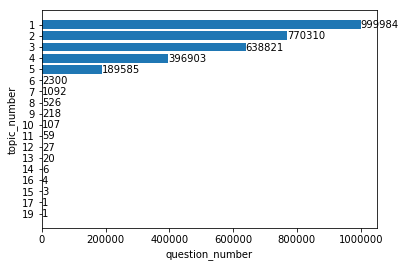

In [4]:
topic_num_count = df_qtopic.topic_num.value_counts()
labels = topic_num_count.index
sizes = topic_num_count.values

y_pos = np.arange(len(sizes))

plt.clf()
fig, ax = plt.subplots()
ax.barh(y_pos, sizes, align='center', linewidth=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
# 标上数值
for x,y in zip(sizes, y_pos):
    ax.text(x+8, y+0.3, '%d'%x)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('question_number')
ax.set_ylabel('topic_number')
# plt.savefig('../figs/3-tags_distribution.png', dpi=300)
plt.show()

在训练集中一共提供了将近 **300万 个问题**，每个问题平均有 **2** 个话题标签。

## 话题总数与每个话题的问题数量

In [5]:
from itertools import chain

topic_ids = list(chain(*(df_qtopic.topic_ids.values)))
print '话题总频数\033[1;35m %d \033[0m' % len(topic_ids)

sr_topic_ids = pd.Series(topic_ids)
topic_ids_count = sr_topic_ids.value_counts()
ids = topic_ids_count.index
id_count = topic_ids_count.values
print '不同的话题个数 \033[1;35m %d \033[0m\t' % len(ids)

话题总频数 7022750 
不同的话题个数  1999 	


每个话题下面问题的数量

In [6]:
print '最多 \033[1;35m %d \033[0m 个问题' % max(id_count)
print '最少 \033[1;35m %d \033[0m 个问题' % min(id_count) 
print '平均 \033[1;35m %d \033[0m 个问题' % np.mean(id_count) 

最多  66259  个问题
最少  1636  个问题
平均  3513  个问题


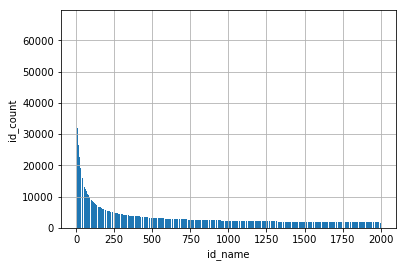

In [7]:
x_pot = np.arange(len(ids)) + 1
plt.bar(x_pot, id_count)
plt.xlabel('id_name')
plt.ylabel('id_count')
plt.grid()
plt.show()

从上面的分布来看，这 1999 类数据的分布还算比较均衡，样本比较多的类别应该是 topic 层次比较高的话题。

## 测试数据分析

In [7]:
df_eval = pd.read_csv('../raw_data/question_eval_set.txt', sep='\t', names=['question_id', 'ch_title', 'word_title', 'ch_content', 'word_content'],
                     dtype={'question_id': object})
print '测试问题数量 \033[1;35m %d \033[0m ' % len(df_eval)

测试问题数量  217360  


In [8]:
df_eval.head(3)

,question_id,ch_title,word_title,ch_content,word_content
0,6215603645409872328,"c924,c531,c102,c284,c188,c104,c98,c107,c11,c11...","w1340,w1341,w55,w1344,w58,w6,w24178,w26959,w47...","c1128,c529,c636,c572,c1321,c139,c540,c223,c510...","w4094,w1618,w20104,w19234,w1097,w1005,w4228,w2..."
1,6649324930261961840,"c346,c1549,c413,c294,c675,c504,c183,c74,c541,c...","w40132,w1357,w1556,w1380,w2464,w33,w16791,w109...",NaN,NaN
2,-4251899610700378615,"c96,c97,c97,c98,c99,c100,c101,c141,c42,c42,c10...","w53,w54,w1779,w54,w1309,w54,w369,w949,w65587,w...","c149,c148,c148,c42,c185,c95,c95,c186,c186,c186...",NaN


In [9]:
na_count = 0
ch_contents = df_eval.ch_content.values
for ch_content in ch_contents:
    if type(ch_content) is float:
        na_count += 1
print '没有内容的问题 \033[1;35m %d \033[0m  ' % na_count
print '一共有 %g 没有问题描述' % (na_count / len(df_eval))

没有内容的问题  55179   
一共有 0.25386 没有问题描述


在测试集中，一共有 25.38% 没有问题描述。**有 3 个问题的 title 分词丢失了。暂时使用 ch 来替代.**

In [10]:
word_titles = df_eval.word_title.values

na_count = 0
na_indexs = list()
for i in xrange(len(word_titles)):
    word_title = word_titles[i]
    if type(word_title) is float:
        na_indexs.append(i)
        na_count += 1
        print i
        
print '没有题目的问题数量 \033[1;35m %d \033[0m  ' % na_count

for na_index in na_indexs:
    df_eval.loc[na_index, 'word_title'] = df_eval.loc[na_index, 'ch_title']

110081
166420
194409
没有题目的问题数量  3   


In [11]:
df_eval.iloc[194409]

question_id                                  -4720539803178200791
ch_title        c149,c148,c148,c42,c185,c95,c95,c42,c147,c104,...
word_title      c149,c148,c148,c42,c185,c95,c95,c42,c147,c104,...
ch_content      c41,c147,c101,c149,c144,c100,c279,c277,c278,c1...
word_content                     w3856,w6,w11610,w469,w625,w31521
Name: 194409, dtype: object

In [12]:
# 话题 title
df_eval['word_title'] = df_eval.word_title.apply(lambda text: text.split(','))
df_eval['ch_title'] = df_eval.ch_title.apply(lambda text: text.split(','))
df_eval['wdtitle_len'] = df_eval.word_title.apply(lambda ws: len(ws))
df_eval['chtitle_len'] = df_eval.ch_title.apply(lambda chs: len(chs))
# 将 描述非空的部分提取出来分析

In [13]:
index_content = df_eval.word_content.apply(lambda wc: type(wc) is not float)
print '非空描述数量 %d ' % sum(index_content)
df_eval_content = df_eval.loc[index_content, :].copy()  # 把带有描述部分取出来
# 话题 描述
df_eval_content['word_content'] = df_eval_content.word_content.apply(lambda text: text.split(','))
df_eval_content['ch_content'] = df_eval_content.ch_content.apply(lambda text: text.split(','))
df_eval_content['wdcontent_len'] = df_eval_content.word_content.apply(lambda ws: len(ws))
df_eval_content['chcontent_len'] = df_eval_content.ch_content.apply(lambda chs: len(chs))

非空描述数量 157126 


In [14]:
df_eval_content.head(2)

,question_id,ch_title,word_title,ch_content,word_content,wdtitle_len,chtitle_len,wdcontent_len,chcontent_len
0,6215603645409872328,"[c924, c531, c102, c284, c188, c104, c98, c107...","[w1340, w1341, w55, w1344, w58, w6, w24178, w2...","[c1128, c529, c636, c572, c1321, c139, c540, c...","[w4094, w1618, w20104, w19234, w1097, w1005, w...",18,29,22,37
3,6213817087034420233,"[c504, c157, c221, c221, c633, c468, c469, c16...","[w5083, w12537, w10427, w29724, w6, w2566, w11...","[c15, c131, c39, c40, c85, c166, c969, c2456, ...","[w2550, w24, w239, w98, w19456, w11, w108710, ...",12,23,13,21


### 测试集话题题目长度分布

In [15]:
wdtitle_len = df_eval.wdtitle_len.values
max_len = max(wdtitle_len)
min_len = min(wdtitle_len)
mean_len = np.mean(wdtitle_len)
median_len = np.median(wdtitle_len)
print '** title 长度（词数）'
print 'max = %d， min = %d, mean = %d, median = %d' % (max_len, min_len, mean_len, median_len)

** title 长度（词数）
max = 76， min = 1, mean = 12, median = 11


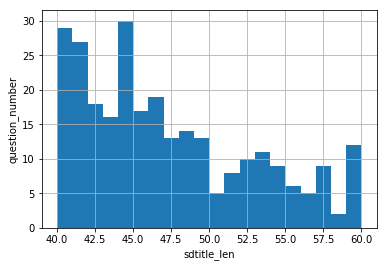

In [20]:
plt.hist(wdtitle_len, bins = 20, range=(40, 60))
plt.xlabel('sdtitle_len')
plt.ylabel('question_number')
plt.grid()
plt.show()

title取最长长度为50；

title 的最后一个词最多的是 ？ 此外还要找到句号或者叹号便于进行句子切分。

### 测试集话题描述长度分布

** content 长度（词数）
max = 2409， min = 1, mean = 80, median = 40


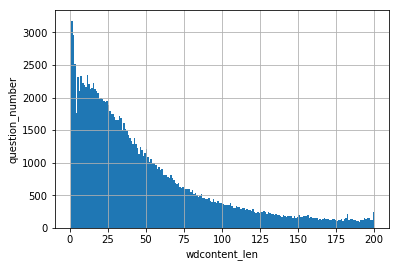

In [21]:
wdcontent_len = df_eval_content.wdcontent_len.values
max_len = max(wdcontent_len)
min_len = min(wdcontent_len)
mean_len = np.mean(wdcontent_len)
median_len = np.median(wdcontent_len)
print '** content 长度（词数）'
print 'max = %d， min = %d, mean = %d, median = %d' % (max_len, min_len, mean_len, median_len)

plt.hist(wdcontent_len, bins = 200, range=(0, 200))
plt.xlabel('wdcontent_len')
plt.ylabel('question_number')
plt.grid()
plt.show()

--------

## 训练集数据分析

In [ ]:
%time df_train = pd.read_csv('../raw_data/question_train_set.txt', sep='\t', names=['question_id', 'ch_title', 'word_title', 'ch_content', 'word_content'],dtype={'question_id': object})
print '训练集问题数量 \033[1;35m %d \033[0m ' % len(df_train)
df_train.head(2)

In [2]:
%time df_train = pd.read_csv('../raw_data/question_train_set.txt', sep='\t', usecols=[2, 4], names=[ 'word_title','word_content'],dtype={'question_id': object})
print '训练集问题数量 \033[1;35m %d \033[0m ' % len(df_train)
df_train.head(2)

CPU times: user 26.4 s, sys: 1.58 s, total: 28 s
Wall time: 36.6 s
训练集问题数量  2999967  


,word_title,word_content
0,"w305,w13549,w22752,w11,w7225,w2565,w1106,w16,w...","w231,w54,w1681,w54,w11506,w5714,w7,w54,w744,w1..."
1,"w377,w54,w285,w57,w349,w54,w108215,w6,w47986,w...","w12508,w1380,w72,w27045,w276,w111"


In [3]:
from itertools import chain

# 统计所有的词数
def split_words(ss):
    if type(ss) is float:
        return []
    return ss.split(',')
time0 = time.time()
words_content = map(split_words, df_train.word_content.values)
words_title = map(split_words, df_train.word_title.values)
words_content = list(chain(*words_content))
words_title = list(chain(*words_title))
words = words_content + words_title
sr_words = pd.Series(words)
words_count = sr_words.value_counts()
print('一共有%d个词；词典大小为%d' %(len(words), len(words_count)))
print('time costed %gs' % (time.time()-time0))

一共有213580879个词；词典大小为570782
time costed 103.478s


In [10]:
print(words_count['w1111'])

17107


In [25]:
questions2 = df_train.question_id.values
print sum(questions1 == questions2)
print len(questions1)

2999967
2999967


In [26]:
na_count = 0
ch_contents = df_train.ch_content.values
for ch_content in ch_contents:
    if type(ch_content) is float:
        na_count += 1
print '没有内容的问题 \033[1;35m %d \033[0m  ' % na_count
print '一共有 %g 没有问题描述' % (na_count / len(df_train))

没有内容的问题  765049   
一共有 0.255019 没有问题描述


In [4]:
word_titles = df_train.word_title.values

na_count = 0
na_indexs = list()
for i in xrange(len(word_titles)):
    word_title = word_titles[i]
    if type(word_title) is float:
        na_indexs.append(i)
        na_count += 1
        print i
        
print '没有题目的问题数量 \033[1;35m %d \033[0m  ' % na_count

# for na_index in na_indexs:
#     df_train.loc[na_index, 'word_title'] = df_train.loc[na_index, 'ch_title']
df_train = df_train.drop(na_indexs) # 将没有title的数据直接丢弃

328877
422123
633584
768738
818616
876828
1273673
1527297
1636237
1682969
2052477
2628516
2657464
2904162
2993517
没有题目的问题数量  15   


In [5]:
df_train['word_title'] = df_train.word_title.apply(lambda text: text.split(','))
df_train['ch_title'] = df_train.ch_title.apply(lambda text: text.split(','))
df_train['wdtitle_len'] = df_train.word_title.apply(lambda ws: len(ws))
df_train['chtitle_len'] = df_train.ch_title.apply(lambda chs: len(chs))

wdtitle_len = df_train.wdtitle_len.values
max_len = max(wdtitle_len)
min_len = min(wdtitle_len)
mean_len = np.mean(wdtitle_len)
median_len = np.median(wdtitle_len)
print '** content 长度（词数）'
print 'max = %d， min = %d, mean = %d, median = %d' % (max_len, min_len, mean_len, median_len)

** content 长度（词数）
max = 187， min = 1, mean = 12, median = 11


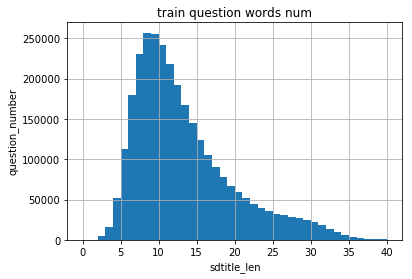

In [6]:
plt.hist(wdtitle_len, bins = 40, range=(0, 40))
plt.xlabel('sdtitle_len')
plt.ylabel('question_number')
plt.title('train question words num')
plt.grid()
plt.show()

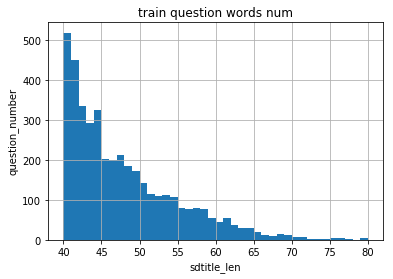

In [29]:
plt.hist(wdtitle_len, bins = 40, range=(40, 80))
plt.xlabel('sdtitle_len')
plt.ylabel('question_number')
plt.title('train question words num')
plt.grid()
plt.show()

### 训练话题描述长度分布

In [32]:
from nltk import FreqDist  

In [30]:
index_content = df_train.word_content.apply(lambda wc: type(wc) is not float)
print '非空描述数量 %d ' % sum(index_content)
df_train_content = df_train.loc[index_content, :].copy()  # 把带有描述部分取出来
# 话题 描述
df_train_content['word_content'] = df_train_content.word_content.apply(lambda text: text.split(','))
df_train_content['ch_content'] = df_train_content.ch_content.apply(lambda text: text.split(','))
df_train_content['wdcontent_len'] = df_train_content.word_content.apply(lambda ws: len(ws))
df_train_content['chcontent_len'] = df_train_content.ch_content.apply(lambda chs: len(chs))

非空描述数量 2165150 


<FreqDist with 1990 samples and 2165150 outcomes>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


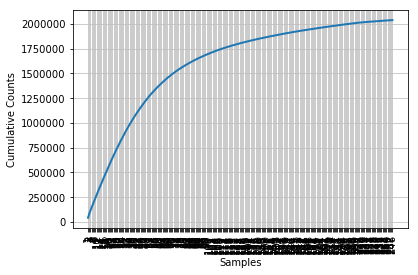

In [40]:
# 统计长度分布
fdist1 = FreqDist(wdcontent_len)
print fdist1                        #<FreqDist with 19317 samples and 260819 outcomes>
vocabulary1 = fdist1.keys()
print vocabulary1[:10]
fdist1[100]                     #906
fdist1.plot(250,cumulative=True)

** content 长度（词数）
max = 2787， min = 1, mean = 80, median = 40


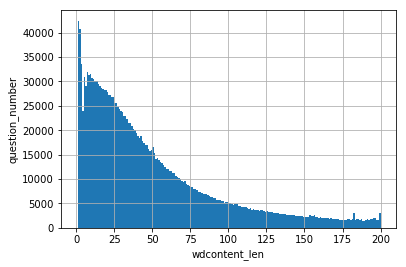

In [31]:
wdcontent_len = df_train_content.wdcontent_len.values
max_len = max(wdcontent_len)
min_len = min(wdcontent_len)
mean_len = np.mean(wdcontent_len)
median_len = np.median(wdcontent_len)
print '** content 长度（词数）'
print 'max = %d， min = %d, mean = %d, median = %d' % (max_len, min_len, mean_len, median_len)

plt.hist(wdcontent_len, bins = 200, range=(0, 200))
plt.xlabel('wdcontent_len')
plt.ylabel('question_number')
plt.grid()
plt.show()

## baseline
**先使用 title 数据来做一各 baseline 模型。**

使用 attention-bigru， max_len 取值为 20.

**使用 content 数据训练 baseline2**

使用 attention-bigru，max_len 取值 100

